Try to load a real data set from causal-learn and use PC algorithm

This code is copied from https://github.com/py-why/causal-learn/blob/main/tests/TestGraphVisualization.py and adapted to work in a notebook

In [1]:
import sys

sys.path.append("")

import io
import unittest
from itertools import product

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from causallearn.graph.Dag import Dag
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
from causallearn.graph.GeneralGraph import GeneralGraph
from causallearn.graph.GraphNode import GraphNode
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.Granger.Granger import Granger
from causallearn.utils.cit import fisherz
from causallearn.utils.DAG2PAG import dag2pag
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.TimeseriesVisualization import plot_time_series

In [2]:
class testGraphVisualization(unittest.TestCase):

    def test_draw_CPDAG(self):
        data_path = "data_linear_10.txt"
        data = np.loadtxt(data_path, skiprows=1)  # Import the file at data_path as data
        cg = pc(data, 0.05, fisherz, True, 0,
                -1)  # Run PC and obtain the estimated graph (CausalGraph object)
        pyd = GraphUtils.to_pydot(cg.G)
        tmp_png = pyd.create_png(f="png")
        fp = io.BytesIO(tmp_png)
        img = mpimg.imread(fp, format='png')
        plt.axis('off')
        plt.imshow(img)
        plt.show()
        print('finish')

    def test_draw_DAG(self):
        nodes = []
        for i in range(3):
            nodes.append(GraphNode(f"X{i + 1}"))
        dag1 = Dag(nodes)

        dag1.add_directed_edge(nodes[0], nodes[1])
        dag1.add_directed_edge(nodes[0], nodes[2])
        dag1.add_directed_edge(nodes[1], nodes[2])

        pyd = GraphUtils.to_pydot(dag1)
        pyd.write_png('dag.png')

    def test_draw_PAG(self):
        nodes = []
        for i in range(5):
            nodes.append(GraphNode(str(i)))
        dag = Dag(nodes)
        dag.add_directed_edge(nodes[0], nodes[1])
        dag.add_directed_edge(nodes[0], nodes[2])
        dag.add_directed_edge(nodes[1], nodes[3])
        dag.add_directed_edge(nodes[2], nodes[4])
        dag.add_directed_edge(nodes[3], nodes[4])
        pag = dag2pag(dag, [nodes[0], nodes[2]])

        pyd = GraphUtils.to_pydot(pag)
        pyd.write_png('pag.png')

    def test_plot_simple_time_series_graph(self):
        coef_matrix = np.zeros((3, 3, 4))
        coef_matrix[0, 0, 1] = 1
        coef_matrix[1, 1, 1] = 1
        coef_matrix[2, 2, 1] = 1
        coef_matrix[0, 1, 1] = 1
        coef_matrix[1, 0, 1] = 1

        plot_time_series(coef_matrix=coef_matrix)

    def test_plot_granger(self):
        df = pd.read_csv('https://cdn.jsdelivr.net/gh/selva86/datasets/a10.csv', parse_dates=['date'])
        df['month'] = df.date.dt.month
        dataset = df[['value', 'month']].to_numpy()
        maxlag = 2
        G = Granger(maxlag=maxlag)
        coeff = G.granger_lasso(data=dataset)
        dim = dataset.shape[1]
        coef_matrix = np.zeros((dataset.shape[1], dataset.shape[1], maxlag + 1))
        for i, j, tau in product(range(dim), range(dim), range(1, maxlag + 1)):
            coef_matrix[i, j, tau] = coeff[j, (tau - 1) * dim + i]
        plot_time_series(coef_matrix=coef_matrix)

    def test_color(self):
        nodes = []
        for i in range(3):
            nodes.append(GraphNode(f"X{i + 1}"))
        pag = GeneralGraph(nodes)
        edge = Edge(nodes[0], nodes[1], Endpoint.TAIL, Endpoint.ARROW)
        edge.properties.append(Edge.Property.dd)
        pag.add_edge(edge)
        edges = [edge]
        pyd = GraphUtils.to_pydot(pag, edges)
        pyd.write_png('green.png')

    def test_plot_with_labels(self):
        nodes = []
        for i in range(3):
            nodes.append(GraphNode(f"X{i + 1}"))
        dag1 = Dag(nodes)

        dag1.add_directed_edge(nodes[0], nodes[1])
        dag1.add_directed_edge(nodes[0], nodes[2])
        dag1.add_directed_edge(nodes[1], nodes[2])

        pyd = GraphUtils.to_pydot(dag1, labels=["A", "B", "C"])
        tmp_png = pyd.create_png(f="png")
        fp = io.BytesIO(tmp_png)
        img = mpimg.imread(fp, format='png')
        plt.axis('off')
        plt.imshow(img)
        plt.show()

    def test_draw_graph_with_labels(self):
        data_path = "data_linear_10.txt"
        data = np.loadtxt(data_path, skiprows=1)
        cg = pc(data, 0.05, fisherz, True, 0, -1)
        cg.draw_pydot_graph(labels=[f"Node_{i + 1}" for i in range(data.shape[1])])

  0%|          | 0/20 [00:00<?, ?it/s]

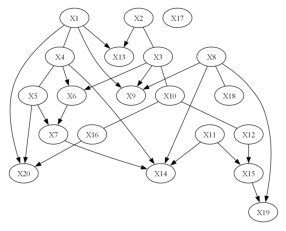

finish


In [3]:
data_path = "data_linear_10.txt"
data = np.loadtxt(data_path, skiprows=1)  # Import the file at data_path as data
cg = pc(data, 0.05, fisherz, True, 0,
        -1)  # Run PC and obtain the estimated graph (CausalGraph object)
pyd = GraphUtils.to_pydot(cg.G)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()
print('finish')

In [4]:
data.shape

(10000, 20)

In [46]:
data_path = "traffic_data.csv"
data_traff_df = pd.read_csv(data_path, skiprows=0)  # Import the file at data_path as data

In [47]:
data_traff_df.dtypes

Local_Authority_(District)                      object
Accident_Count                                   int64
Number_of_Casualties                             int64
Serious                                         object
Fatal                                           object
Date                                            object
Day_of_Week                                     object
Hour                                             int64
Light_Conditions_Darkness - lighting unknown      bool
Light_Conditions_Darkness - lights lit            bool
Light_Conditions_Darkness - lights unlit          bool
Light_Conditions_Darkness - no lighting           bool
Light_Conditions_Daylight                         bool
Weather_Conditions_Fine + high winds              bool
Weather_Conditions_Fine no high winds             bool
Weather_Conditions_Fog or mist                    bool
Weather_Conditions_Other                          bool
Weather_Conditions_Raining + high winds           bool
Weather_Co

We will convert "Fatal" to a binary value.

In [48]:
def binary_fatality(fatal):
    if fatal in ["0","False"]:
        return 0
    else:
        return 1

In [49]:
data_traff_df.Fatal = data_traff_df["Fatal"].apply(binary_fatality)

We want to remove some columns.

In [50]:
cols = []
for c in data_traff_df.columns :
 #   data_traff_df = data_traff_df[]
    if c not in ["Local_Authority_(District)","Date","Day_of_Week","Serious"]:
        cols.append(c)


In [51]:
data_traff_df = data_traff_df[cols]

We convert all bools into integers.

In [52]:
data_traff_df = data_traff_df.astype(int)

C:\Users\frlegoff\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\frlegoff\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


  0%|          | 0/9 [00:00<?, ?it/s]

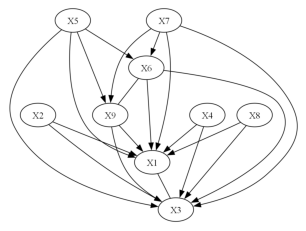

finish


In [53]:
cg = pc(data_traff_df.dropna().values[:700,:9], 0.05, fisherz, True, 0,-1)  # Run PC and obtain the estimated graph (CausalGraph object)
pyd = GraphUtils.to_pydot(cg.G,)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()
print('finish')

  0%|          | 0/9 [00:00<?, ?it/s]

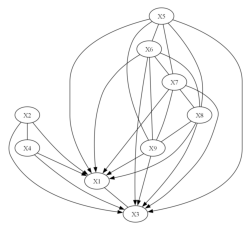

finish


In [45]:
cg = pc(data_traff_df.dropna().values[:700,:9], 0.99, fisherz, True, 0,-1)  # Run PC and obtain the estimated graph (CausalGraph object)
pyd = GraphUtils.to_pydot(cg.G,)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()
print('finish')

In [82]:
cg.G.get_node_names()

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']

In [71]:
cg.G.nodes.index

<function list.index(value, start=0, stop=9223372036854775807, /)>